# Q1

In [32]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [33]:
class Kmeans:
    def __init__(self, k: int, num_iterations: int = 100):
        self.k = k
        self.num_iterations = num_iterations
        self.data = []
        self.centroids = []
        self.clusters = []

        
    def euclidean_distance(
        self,
        x1:float, 
        x2:float
    ) -> float:
        if not isinstance(x1, (int, float)) or not isinstance(x2, (int, float)):
            raise ValueError("A distância só pode ser calculada entre números")

        return ((x1 - x2) ** 2)**0.5
    
    def features_distance(
        self,
        x1:list[float], 
        x2:list[float]
    ) -> float:

        if not isinstance(x1, list) or not isinstance(x2, list):
            raise ValueError("As features devem ser listas de números")
        
        distancies = [self.euclidean_distance(x1[i], x2[i]) for i in range(len(x1))]

        result = 0

        for dist in distancies:

            result += dist

        return result
    
    
    def fit(self, data: list[list[float]]):
        
        self.data = data
        self.centroids = [
            random.choice(data) for _ in range(self.k)
        ]
        
        for _ in range(self.num_iterations):
            self.clusters = [
            [] for _ in range(self.k)
            ]
            for element in data:
                
                distances = []
                
                for centroid in self.centroids:
                    
                    distance = self.features_distance(centroid, element)
                    distances.append(distance)
                    
                closest = min(distances)
                closest_index = distances.index(closest) 
                    
                self.clusters[closest_index].append(element)
                
            
            new_centroids = []
            for cluster in self.clusters:
                
                if cluster:  # Se o cluster não está vazio
                    new_centroid = [sum(feature) / len(cluster) for feature in zip(*cluster)]
                else:  # Se o cluster está vazio, mantenha o centroid anterior
                    new_centroid = random.choice(self.data)  # Ou escolha outro ponto aleatório
                    
                new_centroids.append(new_centroid)
                
            self.centroids = new_centroids



    def predict(self, data: list[list[float]]) -> list[int]:
        """
        Retorna o índice do cluster mais próximo para cada ponto.
        
        - Args:
            - data: lista de pontos a serem classificados.
        
        - Returns:
            - labels: lista com os índices dos clusters mais próximos para cada ponto.
        """
        labels = []
        for element in data:
            distances = [
                self.features_distance(centroid, element) for centroid in self.centroids
            ]
            closest_index = distances.index(min(distances))
            labels.append(closest_index)
        return labels

In [34]:
image = cv2.imread("image.png", cv2.IMREAD_GRAYSCALE)
image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [35]:
image.shape

(408, 612)

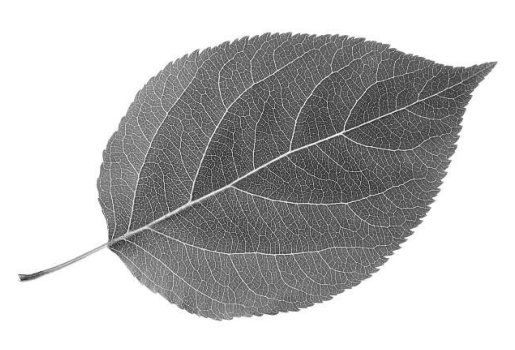

In [36]:
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

In [37]:
len(image)

408

In [38]:
len(image[0])

612

In [39]:
image[0][0]

np.uint8(255)

In [40]:
k_means = Kmeans(3)

In [41]:
pixel_values = image.reshape((-1, 1)).astype(float).tolist() # Convertendo a matriz de pixels para um vetor de pixeis

In [42]:
k_means.fit(pixel_values)

In [43]:
labels = k_means.predict(pixel_values)
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [44]:
print(k_means.centroids)


[[253.5008978727323], [103.68685789101013], [154.78709836764938]]


    np.array(labels).flatten():
        labels contém o índice do cluster para cada pixel.
        flatten() transforma o array de rótulos (geralmente 2D) em um array unidimensional, facilitando a indexação.

    centroids[labels]:
        Aqui, cada valor em labels é usado como índice para acessar o array centroids. Isso substitui o índice do cluster pelo valor do centroid correspondente.

In [45]:
centroids = np.array(k_means.centroids, dtype=np.uint8)
segmented_image = centroids[np.array(labels)]#.flatten()
segmented_image = segmented_image.reshape(image.shape)

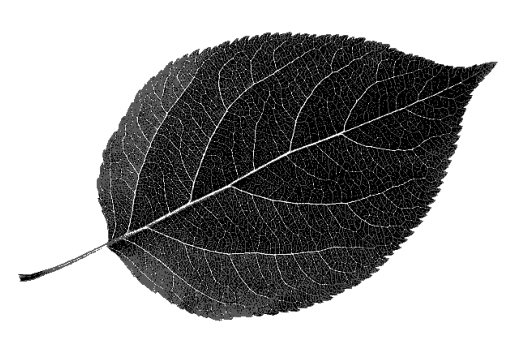

In [46]:
# Visualizar a imagem segmentada
plt.imshow(segmented_image, cmap='gray')
plt.axis('off')
plt.show()

# Q2

In [58]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [47]:
df = pd.read_csv("dataset.csv")
df

,FAMACHA,Mean_R,Mean_G,Mean_B,Median_R,Median_G,Median_B,Std_R,Std_G,Std_B
0,1,39.08,43.85,48.15,41.0,43.5,48.0,35.14,26.39,25.03
1,0,51.66,39.12,41.83,61.0,39.0,41.0,36.79,21.99,21.26
2,1,152.45,128.64,125.36,174.0,130.0,129.0,62.61,43.20,39.56
3,1,51.65,29.81,33.40,59.0,33.0,37.0,28.60,11.62,13.75
4,1,141.32,126.26,140.11,164.0,131.0,149.0,65.99,54.99,61.08
...,...,...,...,...,...,...,...,...,...,...
543,1,183.91,158.82,162.29,232.0,183.0,188.0,89.07,68.33,70.77
544,1,80.75,78.37,79.77,81.0,81.0,82.0,63.30,42.81,44.94
545,0,165.91,110.15,113.49,187.0,102.0,105.0,61.95,47.67,50.13
546,1,112.29,84.75,91.69,141.5,86.0,92.0,76.42,46.94,44.38


In [54]:
y = df["FAMACHA"]
X = df.drop(columns=["FAMACHA"])

In [55]:
X

,Mean_R,Mean_G,Mean_B,Median_R,Median_G,Median_B,Std_R,Std_G,Std_B
0,39.08,43.85,48.15,41.0,43.5,48.0,35.14,26.39,25.03
1,51.66,39.12,41.83,61.0,39.0,41.0,36.79,21.99,21.26
2,152.45,128.64,125.36,174.0,130.0,129.0,62.61,43.20,39.56
3,51.65,29.81,33.40,59.0,33.0,37.0,28.60,11.62,13.75
4,141.32,126.26,140.11,164.0,131.0,149.0,65.99,54.99,61.08
...,...,...,...,...,...,...,...,...,...
543,183.91,158.82,162.29,232.0,183.0,188.0,89.07,68.33,70.77
544,80.75,78.37,79.77,81.0,81.0,82.0,63.30,42.81,44.94
545,165.91,110.15,113.49,187.0,102.0,105.0,61.95,47.67,50.13
546,112.29,84.75,91.69,141.5,86.0,92.0,76.42,46.94,44.38


In [60]:
X.to_numpy()

array([[ 39.08,  43.85,  48.15, ...,  35.14,  26.39,  25.03],
       [ 51.66,  39.12,  41.83, ...,  36.79,  21.99,  21.26],
       [152.45, 128.64, 125.36, ...,  62.61,  43.2 ,  39.56],
       ...,
       [165.91, 110.15, 113.49, ...,  61.95,  47.67,  50.13],
       [112.29,  84.75,  91.69, ...,  76.42,  46.94,  44.38],
       [158.19, 134.38, 134.93, ...,  67.78,  54.45,  52.56]])

## Sem normalizar

In [61]:
# Inicializar o PCA
pca = PCA(n_components=2)

# Ajustar e transformar os dados
reduced_data = pca.fit_transform(X.to_numpy())

# Transformar em um DataFrame
df_reduced = pd.DataFrame(reduced_data, columns=["PC1", "PC2"])

df_reduced

,PC1,PC2
0,-212.328354,-24.429643
1,-205.802228,1.237571
2,29.033911,-2.431369
3,-218.681363,11.188250
4,34.246321,-31.313783
...,...,...
543,144.213724,-23.359727
544,-119.149327,-31.606369
545,11.100532,34.967170
546,-62.010912,6.336340


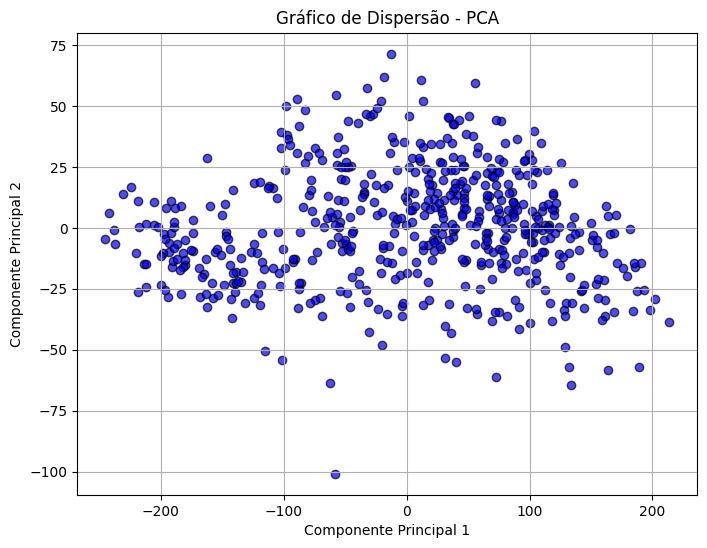

In [ ]:
# Passo 4: Plotar o gráfico de dispersão
plt.figure(figsize=(8,6))
plt.scatter(df_reduced['PC1'], df_reduced['PC2'], c='blue', edgecolor='k', alpha=0.7)
plt.title('Gráfico de Dispersão - PCA = Original')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

## Normalizando

In [59]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled

array([[ 0.76707614, -2.26051351, -1.76395834, ..., -1.98038097,
        -1.45397753, -1.56818879],
       [-1.30365156, -1.98869601, -1.88675847, ..., -1.85990868,
        -1.82839608, -1.87039035],
       [ 0.76707614,  0.18908513,  0.43735739, ...,  0.02530025,
        -0.02352849, -0.4034703 ],
       ...,
       [-1.30365156,  0.4799169 , -0.04267949, ..., -0.02288867,
         0.35684671,  0.44381631],
       [ 0.76707614, -0.67865662, -0.70211362, ...,  1.03361687,
         0.29472727, -0.01710119],
       [-1.30365156,  0.31310997,  0.58637912, ...,  0.40278011,
         0.93379166,  0.63860405]])

In [62]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

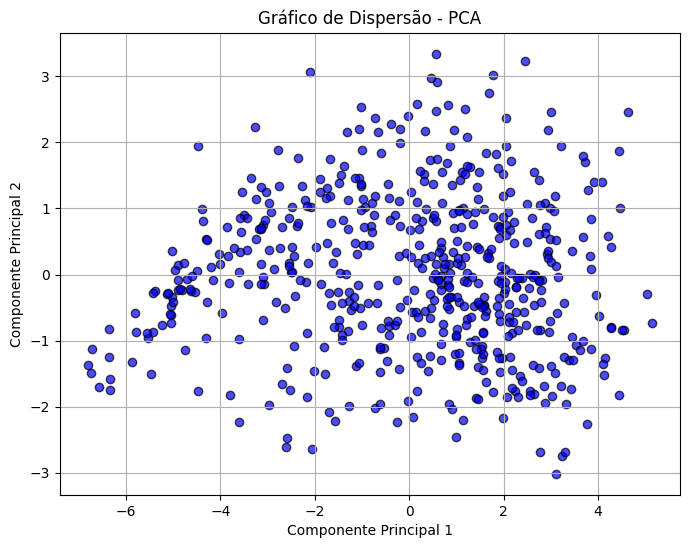

In [63]:
plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='blue', edgecolor='k', alpha=0.7)
plt.title('Gráfico de Dispersão - PCA Normlizado')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

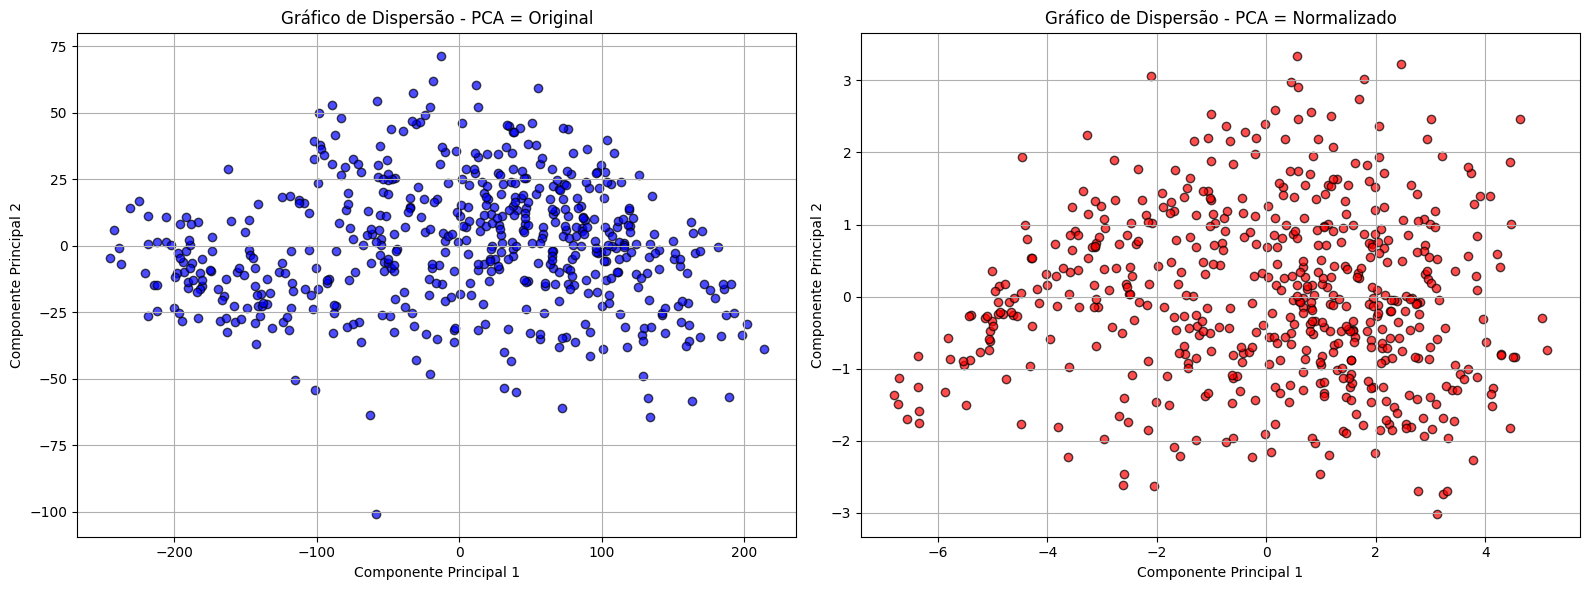

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Primeiro gráfico de dispersão
axes[0].scatter(df_reduced['PC1'], df_reduced['PC2'], c='blue', edgecolor='k', alpha=0.7)
axes[0].set_title('Gráfico de Dispersão - PCA = Original')
axes[0].set_xlabel('Componente Principal 1')
axes[0].set_ylabel('Componente Principal 2')
axes[0].grid(True)

# Segundo gráfico de dispersão (modifique conforme necessário)
axes[1].scatter(pca_df['PC1'], pca_df['PC2'], c='red', edgecolor='k', alpha=0.7)
axes[1].set_title('Gráfico de Dispersão - PCA = Normalizado')
axes[1].set_xlabel('Componente Principal 1')
axes[1].set_ylabel('Componente Principal 2')
axes[1].grid(True)

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Exibir os gráficos
plt.show()

In [65]:
new_k_means = Kmeans(2)

In [67]:
new_k_means.fit(X.to_numpy().tolist())

In [74]:
new_k_means.clusters

[[[39.08, 43.85, 48.15, 41.0, 43.5, 48.0, 35.14, 26.39, 25.03],
  [51.66, 39.12, 41.83, 61.0, 39.0, 41.0, 36.79, 21.99, 21.26],
  [51.65, 29.81, 33.4, 59.0, 33.0, 37.0, 28.6, 11.62, 13.75],
  [106.79, 74.18, 85.15, 103.0, 63.0, 75.0, 67.48, 52.03, 52.91],
  [136.44, 86.33, 90.14, 156.0, 86.0, 92.0, 64.64, 47.44, 49.89],
  [116.66, 92.78, 98.97, 129.0, 98.0, 106.0, 53.86, 35.48, 44.88],
  [139.68, 82.95, 92.8, 146.0, 77.0, 86.0, 52.11, 38.96, 38.32],
  [131.14, 92.96, 94.64, 141.0, 92.0, 94.0, 37.87, 19.61, 16.69],
  [98.19, 94.64, 101.98, 110.0, 95.0, 104.0, 53.06, 34.29, 46.45],
  [167.91, 88.15, 89.63, 186.0, 87.0, 89.0, 57.97, 37.07, 37.68],
  [131.25, 84.53, 108.7, 127.0, 68.0, 96.0, 54.18, 52.01, 56.6],
  [131.53, 68.89, 77.44, 138.0, 61.0, 70.0, 50.21, 37.09, 37.82],
  [91.12, 75.95, 78.98, 111.0, 80.0, 84.0, 66.83, 40.13, 41.85],
  [59.59, 45.86, 47.69, 58.0, 46.0, 46.0, 45.86, 25.55, 26.64],
  [70.84, 68.42, 68.86, 83.0, 80.0, 77.0, 53.52, 32.45, 24.89],
  [61.41, 36.56, 43.48,

In [83]:
def show_clusters1(k_means: Kmeans):
    left = np.array(k_means.clusters[0])
    right = np.array(k_means.clusters[1])

    # Selecionando as colunas para o gráfico de dispersão (PC1 e PC2)
    xl = left[:, 0]  # Primeira coluna (pode ser o PC1, por exemplo)
    yl = left[:, 1]  # Segunda coluna (pode ser o PC2, por exemplo)

    xr = right[:, 0]  # Primeira coluna (pode ser o PC1, por exemplo)
    yr = right[:, 1]  # Segunda coluna (pode ser o PC2, por exemplo)

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Primeiro gráfico de dispersão
    axes[0].scatter(xl, yl, c='blue', edgecolor='k', alpha=0.7)
    axes[0].set_title('Cluster 1')
    axes[0].set_xlabel('X')
    axes[0].set_ylabel('Y')
    axes[0].grid(True)

    # Segundo gráfico de dispersão (modifique conforme necessário)
    axes[1].scatter(xr, yr, c='red', edgecolor='k', alpha=0.7)
    axes[1].set_title('Cluster 2')
    axes[1].set_xlabel('X')
    axes[1].set_ylabel('Y')
    axes[1].grid(True)

    # Ajustar layout para evitar sobreposição
    plt.tight_layout()

    # Exibir os gráficos
    plt.show()

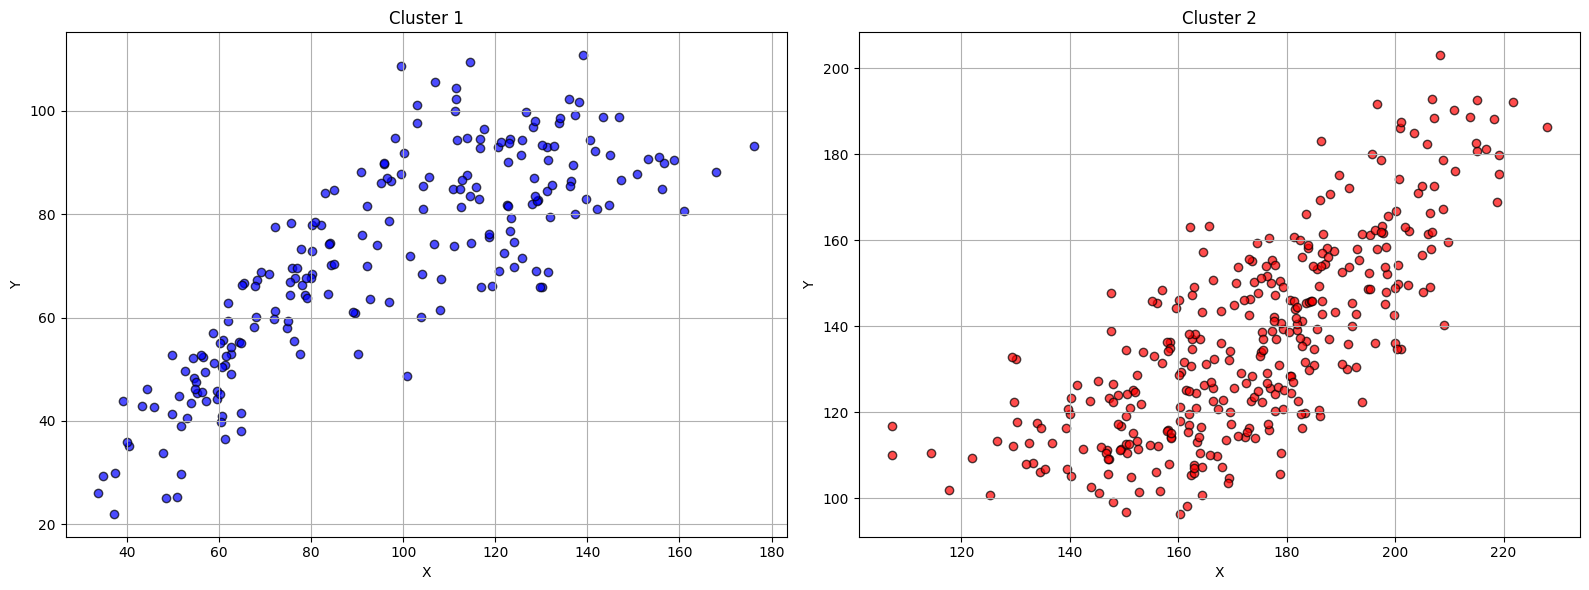

In [84]:
show_clusters(new_k_means)

In [93]:

def show_clusters(new_k_means: Kmeans):
    # Supondo que left e right sejam as matrizes de dados dos dois clusters
    left = np.array(new_k_means.clusters[0])
    right = np.array(new_k_means.clusters[1])

    # Selecionando as colunas para o gráfico de dispersão (PC1 e PC2)
    xl = left[:, 0]  # Primeira coluna (pode ser o PC1, por exemplo)
    yl = left[:, 1]  # Segunda coluna (pode ser o PC2, por exemplo)

    xr = right[:, 0]  # Primeira coluna (pode ser o PC1, por exemplo)
    yr = right[:, 1]  # Segunda coluna (pode ser o PC2, por exemplo)

    # Criando o gráfico de dispersão
    plt.figure(figsize=(8, 6))

    # Plotando o Cluster 1
    plt.scatter(xl, yl, c='blue', edgecolor='k', alpha=0.7, label='Cluster 1')

    # Plotando o Cluster 2
    plt.scatter(xr, yr, c='red', edgecolor='k', alpha=0.7, label='Cluster 2')

    # Adicionando título e rótulos aos eixos
    plt.title('Gráfico de Dispersão - Cluster 1 e Cluster 2')
    plt.xlabel('1')
    plt.ylabel('2')

    # Exibindo a legenda
    plt.legend()

    # Adicionando a grade
    plt.grid(True)

    # Exibindo o gráfico
    plt.show()


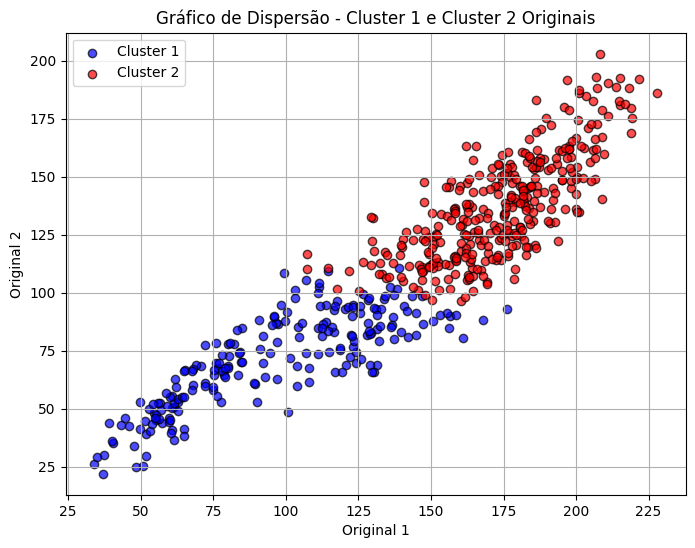

In [88]:
show_clusters(new_k_means)

In [80]:
df_reduced.to_numpy().tolist()

[[-212.32835434415955, -24.42964326910411],
 [-205.8022278784643, 1.2375710270314126],
 [29.033910853068676, -2.4313688014342887],
 [-218.6813626711704, 11.188249508187967],
 [34.246320970758745, -31.313782603972147],
 [-105.04686771462943, -1.6045939619769216],
 [-44.89429017028954, 25.39287569011676],
 [-52.980372196564986, -9.669618363483368],
 [-56.70633907988497, 30.52220180351218],
 [20.527919264611683, 17.424104468061053],
 [-15.31579329452586, 17.57869360668076],
 [75.45684004290797, -8.553538687889128],
 [105.32891997366545, 4.971418756450358],
 [-53.14087679736883, 20.25148284424243],
 [85.73163356745181, 14.744799642032735],
 [80.03914144486322, 34.91398595912756],
 [13.449413859632898, -9.155362627690993],
 [-70.53869279547376, -28.620906891011177],
 [-18.71287289126849, 61.95984483796755],
 [-61.040464405415946, 4.533181461613901],
 [-9.90379488006272, 35.26631851190754],
 [66.06323690717, -1.9611314123211248],
 [-87.38330253509704, 41.59147425533977],
 [37.08432347300004,

In [85]:
another_k_means = Kmeans(2)
another_k_means.fit(df_reduced.to_numpy().tolist())


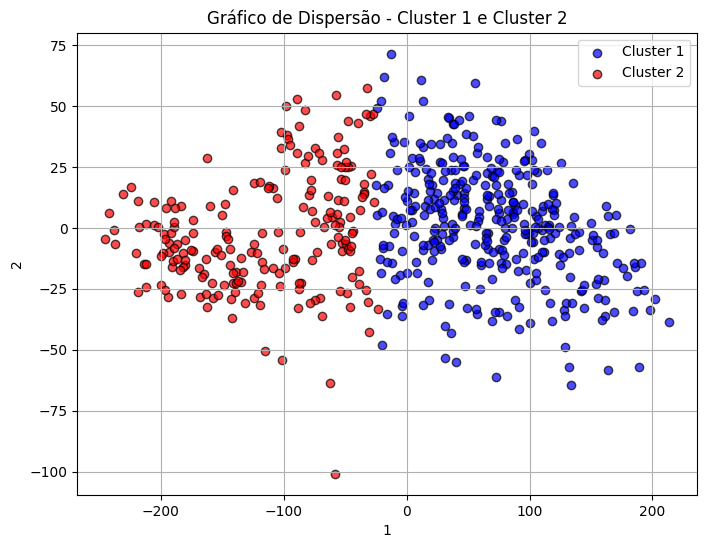

In [94]:
show_clusters(another_k_means)

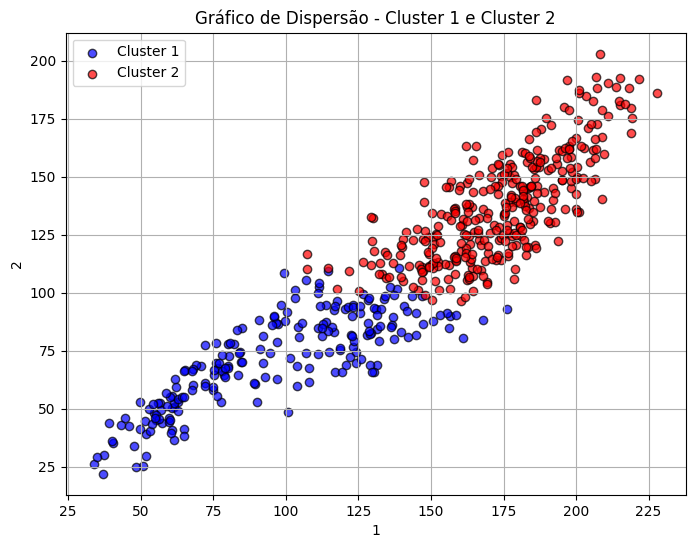

In [95]:
show_clusters(new_k_means) # Original

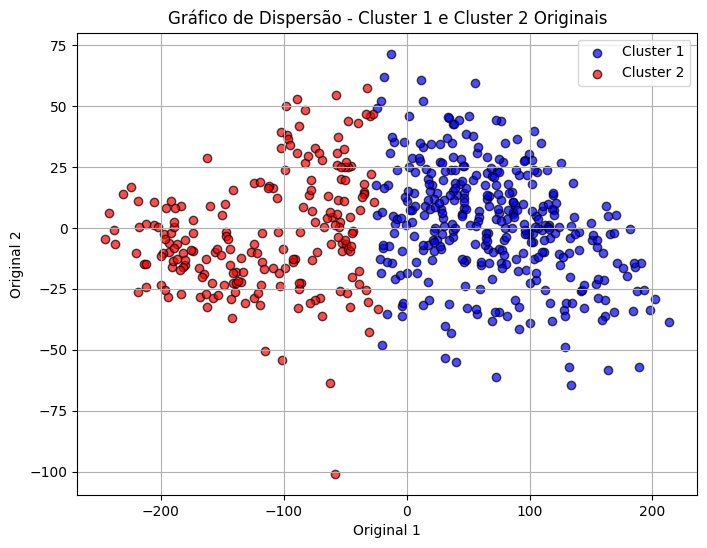

In [91]:
show_clusters(another_k_means) # PCA